# Project: Tbmd Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data is about Movies and its attributes like rating and revenues and we will figure how the propareties are related to each other

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [3]:
df = pd.read_csv("tmdb-movies.csv")   #read the csv file
df.head()                             #explore the first 5 rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.tail() #explore the last 5 rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
df.shape #expolre the shape of the database

(10866, 21)

In [6]:
df.describe()  #describe some statistics about the data

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


-From this desctibtion we note that the mean on popularity between movies is 64% and the mean budget is 14.2 million dollars

-Also we note that the max of all movies has 4.2 billion dollars

-Maximum vote average is 92%

In [7]:
df.info()      #explore the data types and the null values in each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
df.isna().sum()    #calculate the null values in each column

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

so colomns imdb_id, cast,homepage director,tagline,keywords,overview,genres and production_companies have null values



### Data Cleaning (Dropping all columns with null values)

In [9]:
#drop some colums that have null values and the are not in our scope
drop_columns = ["imdb_id", "cast","homepage" ,"director","tagline","keywords","overview","production_companies"]
df.drop(drop_columns,axis=1,inplace= True) 

In [10]:
df.dropna(inplace=True)    #drop all the rows with null values

### checking again for any missing values:

In [11]:
df.isna().sum() #check again for the missing values and we are done

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

### Extract month from release_date 

In [12]:
#create a new column for month
df["relase_month"]=pd.DatetimeIndex(df["release_date"]).month  

In [13]:
df.head() #check if the new column is added

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,relase_month
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,4


### Create a class for better approximation to the votes

In [14]:
#create a new clomun for class of votes for approximation
df['class'] = df['vote_average'].apply(lambda x: 'low' if x <= 4 else ("modrate" if x <= 6  else "high"))
df.tail()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,relase_month,class
10861,21,0.080598,0,0,The Endless Summer,95,Documentary,6/15/66,11,7.4,1966,0.000000,0.0,6,high
10862,20379,0.065543,0,0,Grand Prix,176,Action|Adventure|Drama,12/21/66,20,5.7,1966,0.000000,0.0,12,modrate
10863,39768,0.065141,0,0,Beregis Avtomobilya,94,Mystery|Comedy,1/1/66,11,6.5,1966,0.000000,0.0,1,high
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,11/2/66,22,5.4,1966,0.000000,0.0,11,modrate
10865,22293,0.035919,19000,0,Manos: The Hands of Fate,74,Horror,11/15/66,15,1.5,1966,127642.279154,0.0,11,low


<a id='Exploratory Data Analysis'></a>
## Exploratory Data Analysis


In [15]:

def plot_scatter(coloumn1,coloumn2,name1,name2,title):
    
    '''
    this function is used to plot data between two columns to figure out the relationship between them(correlation)
    
    coloumn1 : data frame first coloumn
    coloumn2 : data frame second coloumn
    name1 : first coloumn name
    name2 : second coloumn name
    title : title of the figure
    '''
    plt.scatter(coloumn1, coloumn2)
    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.title(title)
    
def modify_font(x):
    '''
    This fuction modify the font size of the graph
    x : is the new size
    '''
    plt.rcParams.update({'font.size': x})
    
def revenue_sum_to_group(groupe,title1,x,y):
    '''
    this function group the data into groupes 
    and then find the releation between the groupes and the revenue sum
    groupe: column to be grouped by
    title1: the title of the graph
    x,y: the width and lenght of the graph
    '''
    summation = df.groupby(groupe).revenue.sum()   # group by the group and then take the sum for each group
    summation.plot(kind="bar",title=title1,ylabel="revenue sum"
                                                ,figsize=(x,y));
    
def popularity_sum_to_group(groupe,title1,x,y):
    '''
    this function group the data into groupes 
    and then find the releation between the groupes and the populatiy sum
    groupe: column to be grouped by
    title1: the title of the graph
    x,y: the width and lenght of the graph
    '''
    summation = df.groupby(groupe).popularity.sum()   # group by the group and then take the sum for each group
    summation.plot(kind="bar",title=title1,ylabel="popularity sum"
                                            ,figsize=(x,y));

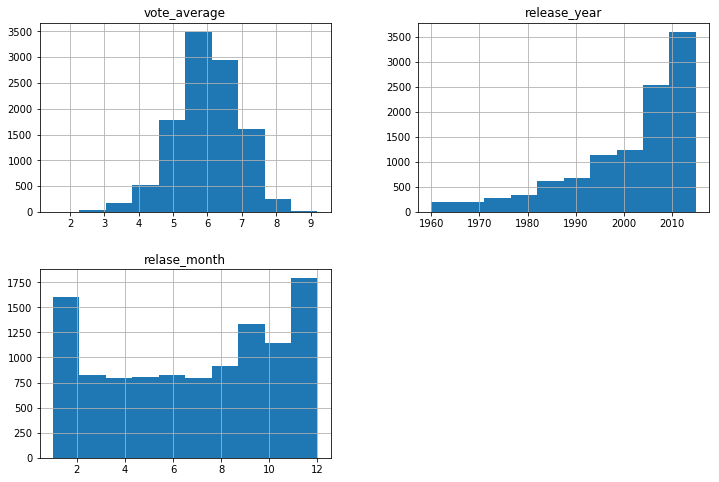

In [16]:
#plotting some the columums with respect to its value 
df.hist(column=["vote_average","release_year","relase_month"],figsize=(12,8));

## from the previous figures we can conconclude that:
    
    -the mean on the vote average is between 5 and 6
    -the more time goes by the higher the no. of releses
    -the highest no. of releses is in descember 

## Q1: What kinds of properties are associated with movies that have high revenues?

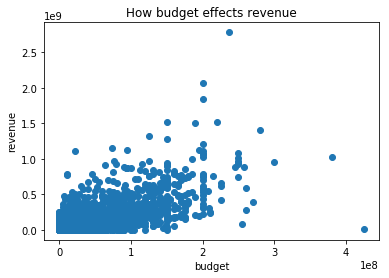

In [20]:
#plot buget vs revenue
plot_scatter(df.budget,df.revenue,"budget","revenue","How budget effects revenue") 

we can see that there is some positive corrleation betweeen the budget and the revenue

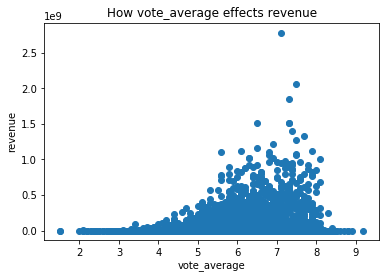

In [19]:
#plot vote average vs revenue
plot_scatter(df.vote_average,df.revenue,"vote_average","revenue","How vote_average effects revenue")

we can see that there is some positive corrleation betweeen the vote average and the revenue

#### its not too obvious so we can extract the ratings into classes lets say 3 classes:
#### (high,low,modrate)
#### and then group by these classes and find the mean for each class and polt the relationship like this:

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

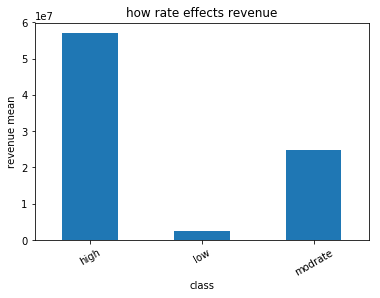

In [21]:
#plot class vs revenue mean
df.groupby(df["class"]).revenue.mean().plot(kind="bar",title="how rate effects revenue",ylabel="revenue mean")
plt.xticks(rotation=30, horizontalalignment="center")


as the movie gets higher rates, the revenue also gets higher

## Q2: What kinds of properties are associated with movies that have high popularity?

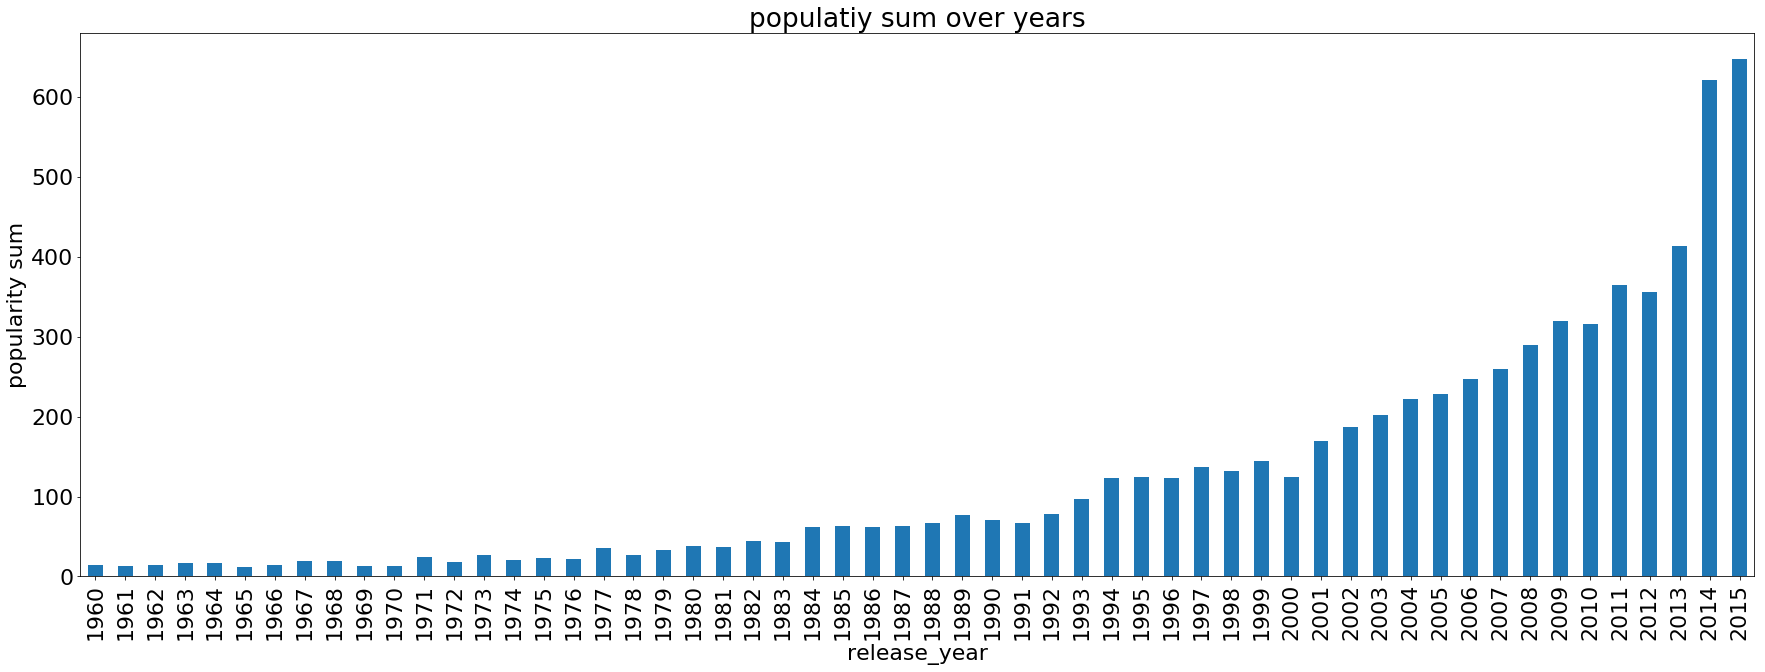

In [22]:
# group by the year and then take the sum for each year and plot the summation for each year
modify_font(22) #make the font bigger
popularity_sum_to_group(df.release_year,"populatiy sum over years",30,10)

as years goes by the popularity gets higher

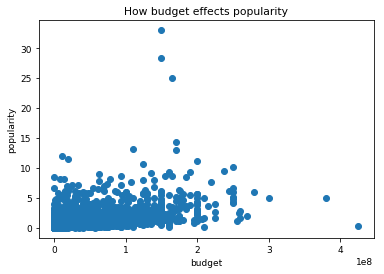

In [23]:
#plot budget vs popularity
modify_font(9) #back to default 
plot_scatter(df.budget,df.popularity,"budget","popularity","How budget effects popularity")

there is some positive corrleation between the budget and the popularity

# Q3: which month have the highest revenue ?

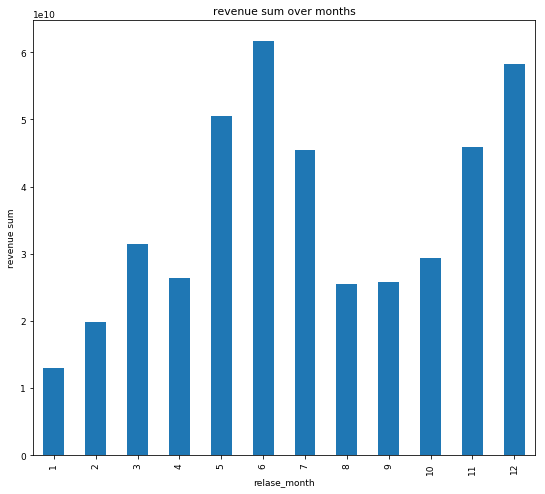

In [24]:
modify_font(9) #restore the default 
revenue_sum_to_group(df.relase_month,"revenue sum over months",9,8)

we note that the best month to relese is June then December

## Q4: Which year has the highest revenue?

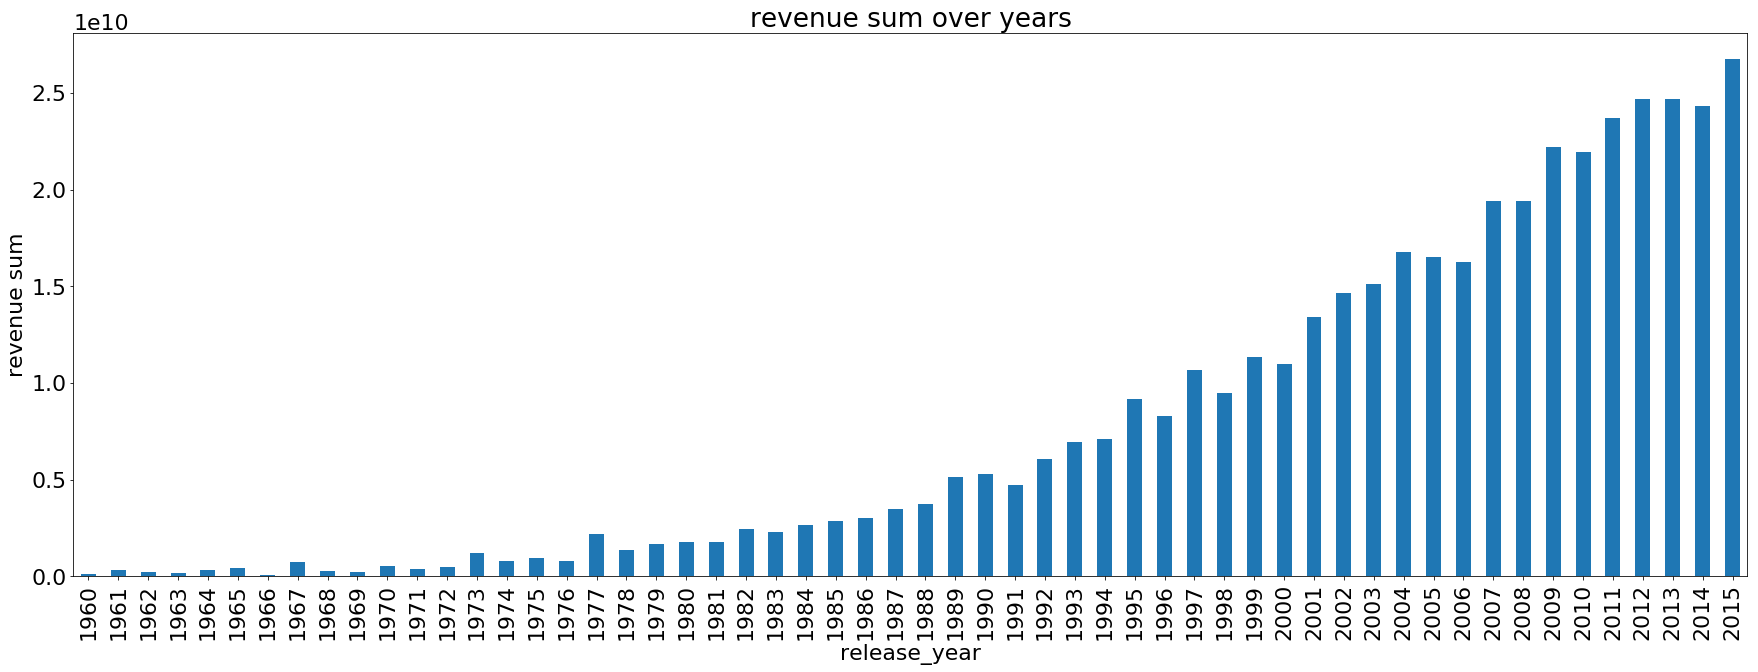

In [25]:
# group by the year and then take the sum for each year and plot the summation for each year
modify_font(22) #make the font bigger
revenue_sum_to_group(df.release_year,"revenue sum over years",30,10)

we can easily see that 2015 have the highest revenue sum

## Q5: Which year has the highest movie releases?

In [26]:
counts=df.groupby(df.release_year).count()
print("max number of releses is at {} with {} movies".format(counts.idxmax()[0],counts.max()[0]))

max number of releses is at 2014 with 699 movies


<a id='conclusions'></a>
## Conclusions



     -As rate and budget increase, revenue increases 
     -There is a high correleation between the rates and the revenue
     -as budget and year increaseing the popularity increases
     -There is a moderated correleation between the (budget,year) and the popularity
     -max number of releses is at 2014 with 699 movies
     -2015 have the highest revenue sum
     -best month to relese a movie is June then December
     -as the movie gets higher rates, the revenue also gets higher


## Limitations

rows with null values have been removed so our counclusions are't 100% accurate. 

the budget and revenue aren't have currency specified.
